# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import libraries
import helper
import numpy as np
import cv2
import tensorflow as tf
from sklearn.utils import shuffle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# to save the trained model
model_path = './checkpoint/traffic_sign_classification'

In [2]:
# read the training, validation and test data
train, valid, test = helper.get_train_validation_test_data()

train_X, train_Y = train['features'], train['labels']
valid_X, valid_Y = valid['features'], valid['labels']
test_X,  test_Y  = test['features'],  test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples    = 34,799
Number of validation examples  = 4,410
Number of testing examples     = 12,630
Image data shape               = (32, 32, 3)
Number of classes              = 43
Training data stats 

Samples: 34,799
Classes: 43
ID:  0, Samples:  180, Name: Speed limit (20km/h)
ID:  1, Samples: 1980, Name: Speed limit (30km/h)
ID:  2, Samples: 2010, Name: Speed limit (50km/h)
ID:  3, Samples: 1260, Name: Speed limit (60km/h)
ID:  4, Samples: 1770, Name: Speed limit (70km/h)
ID:  5, Samples: 1650, Name: Speed limit (80km/h)
ID:  6, Samples:  360, Name: End of speed limit (80km/h)
ID:  7, Samples: 1290, Name: Speed limit (100km/h)
ID:  8, Samples: 1260, Name: Speed limit (120km/h)
ID:  9, Samples: 1320, Name: No passing
ID: 10, Samples: 1800, Name: No passing for vehicles over 3.5 metric tons
ID: 11, Samples: 1170, Name: Right-of-way at the next intersection
ID: 12, Samples: 1890, Name: Priority road
ID: 13, Samples: 1920, Name: Yield
ID: 14, Samples:  690, Name: Sto

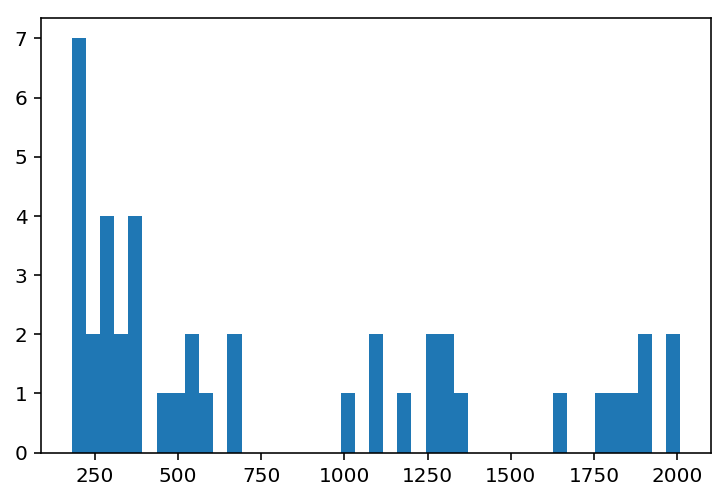

In [3]:
# Number of training examples
n_train = len(train_X)

# Number of validation examples
n_validation = len(valid_X)

# Number of testing examples.
n_test = len(test_X)

#  What's the shape of an traffic sign image?
image_shape = train_X[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train_Y))

print('Number of training examples    = {:,}'.format(n_train))
print('Number of validation examples  = {:,}'.format(n_validation))
print('Number of testing examples     = {:,}'.format(n_test))
print('Image data shape               = {}'.format(image_shape))
print('Number of classes              = {:,}'.format(n_classes))

print('Training data stats \n\r')

helper.print_data_stats(train_X, train_Y)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


Sample Image 4000:
Image - Shape: (32, 32, 3)
Label - Id: 1 Name: Speed limit (30km/h)


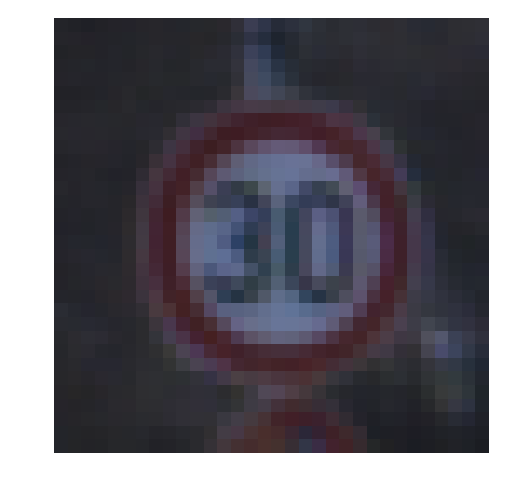

In [65]:
sample_id = 4000

# show selected sample
helper.show_sample(train_X, train_Y, sample_id)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# one-hot encoder empty array
n_classes       = len(np.unique(train_Y))
label_encoding  = np.eye(n_classes)
normalize_max   = 128.
normalize_min   = 127.

def one_hot_encode(x):
    """
    One-hot encoding of the sample x
    """
    return label_encoding[x]
   
    
def normalize(x):
    """
    Normalize x values
    """
    return (x - normalize_min) / normalize_max


def convert_to_gray(image):
    """
    Converts image from RGB to Gray scale
    """
    shape = image.shape
    
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    # preserve the color channel
    
    gray = gray.reshape([shape[0], shape[1], 1])
    
    return gray

def preprocess_data(X, Y):
    """
    Proprocess feature and labels set data 
    """
    trans_X = np.ndarray(shape = (X.shape[0], X.shape[1], X.shape[2], 1), dtype = float)
    trans_Y = np.ndarray(shape =(len(Y), n_classes), dtype = float)
            
    for i in range(len(X)):
        gray_image = convert_to_gray(X[i])
        gray_image = normalize(gray_image)
                        
        trans_X[i] = gray_image
        trans_Y[i] = one_hot_encode(Y[i])
    
    return (trans_X, trans_Y)

In [6]:

# preprocess the training, validation and test data and save to the disk
helper.preprocess_save_data(train_X, train_Y, preprocess_data, data_type = "train")
helper.preprocess_save_data(valid_X, valid_Y, preprocess_data, data_type = "valid")
helper.preprocess_save_data(valid_X, valid_Y, preprocess_data, data_type = "test")


Saved pre-processed train data to file ./data/preprocess_train.p
Saved pre-processed valid data to file ./data/preprocess_valid.p
Saved pre-processed test data to file ./data/preprocess_test.p


### Reload Preprocessed training, validation and test data


In [7]:
train_x, train_y = helper.get_preprocess_data(data_type = 'train')

print('Preprocessed Train Features: {}, Labels: {}'.format(train_x.shape, train_y.shape))

Preprocessed Train Features: (34799, 32, 32, 1), Labels: (34799, 43)


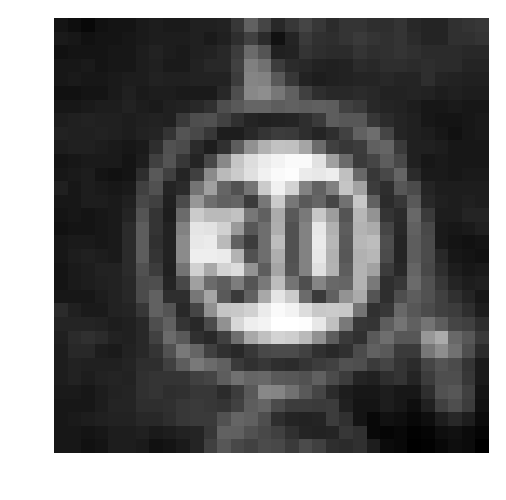

In [70]:
# show image after gray scale transformation
helper.show_image(train_x[sample_id].reshape(32,32), channel = 'gray')

### Model Architecture

#### Input Layer

In [8]:
def nn_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    
    # image is of shapre 32x32x1. Keep 4d tensor to accept input [batch_size, height, width, depth]
    
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name = 'x')
        

def nn_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    
    return tf.placeholder(tf.float32, [None, n_classes], name = 'y')
    
    
def nn_keep_prob_input():
    """
    Return a Tensor for dropout probability
    : return: Tensor
    """
    
    return tf.placeholder(tf.float32, name = 'keep_prob')


def nn_learning_rate():
    """
    Return a Tensor for learning rate
    : return: Tensor
    """
    
    return tf.placeholder(tf.float32, name = 'learn_rate')


#### Convolution Layer

In [9]:
def convolution(x_tensor, conv_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, pad = 'VALID'):
    """
    Apply convolution followed by max pooling to x_tensor
    : x_tensor: input tensor
    : conv_outputs: Number of outputs for the convolutional layer
    : conv_ksize: kernal size 2-D Tuple for the convolutional layer
    : conv_strides: Stride 2-D Tuple for convolution
    : pool_ksize: kernal size 2-D Tuple for pool
    : pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
            
    # get the input image shape - [height, width, depth]
    [batch_size, input_height, input_width, input_depth] = x_tensor.get_shape().as_list()
    
    filter_height = conv_ksize[0]
    filter_width  = conv_ksize[1]
    
    # init weights and biases for input tensor
    weights = tf.Variable(tf.truncated_normal([filter_height, filter_width, input_depth, conv_outputs], 
                                              mean = 0.0, stddev = 0.1))
    
    biases  = tf.Variable(tf.zeros(conv_outputs))
    
    # perform convolution to input image
    conv_stride = [1, conv_strides[0], conv_strides[1], 1]
            
    conv = tf.nn.conv2d(x_tensor, weights, strides = conv_stride, padding = pad)
    
    # add bias to convoluted tensor
    conv = tf.nn.bias_add(conv, biases)
    
    # add activation function
    conv_output = tf.nn.relu(conv)
    
    # apply max pooling to output image
    pool_size   = [1, pool_ksize[0], pool_ksize[1], 1]
    pool_stride = [1, pool_strides[0], pool_strides[1], 1]
    
    conv_max_pool = tf.nn.max_pool(conv_output, ksize = pool_size, strides = pool_stride, padding = pad)
            
    return conv_max_pool

### Flatten And Dense Layer

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, *), where * is the image dimension.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    
    [batch_size, height, width, depth] = x_tensor.get_shape().as_list()
        
    return tf.reshape(x_tensor, [-1, height * width * depth])

    
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # get the tensor shape [Batch_size, input_size]
    shape = x_tensor.get_shape().as_list()
    
    # init weights [input x output] and biases [output]
    weights = tf.Variable(tf.truncated_normal([shape[-1], num_outputs], mean = 0.0, stddev = 0.13))
    
    biases  = tf.Variable(tf.zeros([num_outputs]))
    
    # add the output layer and transformation function
    connected_layer = tf.add(tf.matmul(x_tensor, weights), biases)
    connected_layer = tf.nn.relu(connected_layer)
    
    return connected_layer


def output(x_tensor, num_outputs):
    """
    Apply an output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    
    # get the tensor shape [Batch_size, input_size]
    shape = x_tensor.get_shape().as_list()
    
    # init weights and biases
    weights = tf.Variable(tf.truncated_normal([shape[-1], num_outputs], mean = 0.0, stddev = 0.17))
    
    biases  = tf.Variable(tf.zeros(num_outputs))
    
    # add the output layer without any transformation
    output_layer = tf.add(tf.matmul(x_tensor, weights), biases)
        
    # return the output layer
    return output_layer

### Neural Network Model

In [11]:
def create_network(x, num_outputs, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that holds dropout probability.
    : return: Tensor that represents logits
    """
    
    conv_layers   = [4, 16, 64]
    conv_ksize    = (4, 4)
    conv_strides  = (1,1)
    pool_ksize    = (2, 2)
    pool_strides  = (2, 2)
                
    # layer-1: convolution [32x32x1] --> [28x28x4] --> [14x14x4]
    conv_layer1 = convolution(x, conv_layers[0], conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    print('Added 1st convolution layer: {}'.format(conv_layer1.get_shape()))
    
    # layer-2: convolution [14x14x4] --> [10x10x16] --> [5x5x16]
    conv_layer2 = convolution(conv_layer1, conv_layers[1], conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    print('Added 2nd convolution layer: {}'.format(conv_layer2.get_shape()))
    
    # layer-3: convolution [5x5x16] --> [5x5x64] --> [3x3x64]
    conv_layer3 = convolution(conv_layer2, conv_layers[2], conv_ksize, conv_strides, pool_ksize, pool_strides, pad = 'SAME')
    
    print('Added 3rd convolution layer: {}'.format(conv_layer3.get_shape()))
    
    # flatten tensor to convert to fully connected layers
    flat_layer = flatten(conv_layer3)
                
    # build fully connected layers [3x3x64] -> [1024] -> [256] -> [64] -> [10]
    conn_layer1 = fully_conn(flat_layer, 1024)
    conn_layer1 = tf.nn.dropout(conn_layer1, keep_prob)
        
    conn_layer2 = fully_conn(conn_layer1, 256)
    conn_layer2 = tf.nn.dropout(conn_layer2, keep_prob)
    
    conn_layer3 = fully_conn(conn_layer2, 64)
    conn_layer3 = tf.nn.dropout(conn_layer3, keep_prob)
        
    output_layer = output(conn_layer3, num_outputs)
    
    # return output
    return output_layer

#### Build the model

In [12]:
def build_model(x, y, keep_prob, learn_rate):
    """
    Build the convolution neural network model for tensor flow
    : x: input feature tensor
    : y: output labels tensor
    : keep_prob: dropout probability tensor
    : learn_rate: learning rate tensor
    : return : list of optimizer, cost and accuracy tensors
    """
       
    # create model
    y_shape = y.get_shape().as_list()
    
    logits = create_network(x, y_shape[1], keep_prob)
    
    # set name for logit to load it from disk
    logits = tf.identity(logits, name = 'logits')
    
    # define loss and optimizer
    cost  = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y)
    cost  = tf.reduce_mean(cost)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    optimizer = optimizer.minimize(cost)
    
    # find prediction accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    return [optimizer, cost, accuracy]

In [13]:
def  print_stats(session, cost, accuracy, cost_dict, valid_dict):
    """
    Calculate and print loss and validation accuracy of the network
    : session: current tensorflow session
    : cost: cost tensor
    : accuracy: accuracy tensor
    : cost_dict: cost params dictionary
    : valid_dict: validation params dictionary
    """
        
    loss = session.run(cost, feed_dict = cost_dict)
    
    valid_accuracy = session.run(accuracy, feed_dict = valid_dict)
    
    print('Loss: {:10.7f}, Validation Accuracy: {:.6f} %'.format(loss, valid_accuracy * 100))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
def train_neural_network(train_params, model_path, show_batch_stats = False):
    """
    Train neural network with given parameters
    : train_parameters : training hyper parameters ('epochs', 'batch_size', 'learning_rate', 'dropout')
    : model_path : save the trained model at this location.
    : show_batch_stats : print stats for every 100th batch, for all epochs.
    """
    
    # load training data
    train_x, train_y = helper.get_preprocess_data(data_type = 'train')
    valid_x, valid_y = helper.get_preprocess_data(data_type = 'valid')
                       
    print('Building the network... \r\n')
            
    epochs        = train_params['epochs']
    batch_size    = train_params['batch_size']
    learning_rate = train_params['learning_rate'] 
    dropout       = train_params['dropout']
    
    # shuffle training data
    train_x, train_y = shuffle(train_x, train_y)
    
    num_inputs  = train_x.shape[1]
    num_outputs = train_y.shape[1]
    
    # reset current state
    tf.reset_default_graph()
            
    # create input, output, dropout and learning rate tensors
    x = nn_image_input(train_x.shape[1:])
    y = nn_label_input(num_outputs)
    
    keep_prob  = nn_keep_prob_input()
    learn_rate = nn_learning_rate()
    
    # get  the model
    optimizer, cost, accuracy = build_model(x, y, keep_prob, learn_rate)
        
    # validation dictionary is fixed for all batches
    valid_dict = {x: valid_x, y: valid_y, keep_prob: 1. }
    
    print('\r\nTraining the network...\r\n')
    
    with tf.Session() as session:
        
        session.run(tf.global_variables_initializer())
        
        for epoch in np.arange(epochs): 
            
            batch_num = 1
                                    
            for feature_batch, label_batch in  helper.batch_features_labels(train_x, train_y, batch_size):
                                            
                # train with current batch                                    
                feed_dict = {x:feature_batch, 
                             y:label_batch, 
                             keep_prob:dropout, 
                             learn_rate:learning_rate}
                
                session.run(optimizer, feed_dict = feed_dict)
                
                if show_batch_stats and batch_num % 50 == 0:
                    
                    # print current network loss and accuracy
                    print('Epoch {:4}, Batch {:3}: '.format(epoch + 1, batch_num), end = '')
                    
                    cost_dict = {x: feature_batch, y: label_batch, keep_prob: 1.}
                    print_stats(session, cost, accuracy, cost_dict, valid_dict)
                                                            
                batch_num += 1
            
            # print stats after each iteration
            print('Epoch {:4} *Completed. '.format(epoch + 1), end = '')
            
            cost_dict = {x: feature_batch, y: label_batch, keep_prob: 1.}                
            print_stats(session, cost, accuracy, cost_dict, valid_dict)
            
        print('\r\nTrained neural network.\r\n')
        
        # save model if path is given
        if model_path:
            print('Saving trained model...')
            saver = tf.train.Saver()
            save_path = saver.save(session, model_path)
            print('Model saved @ {}'.format(save_path))


In [34]:
# set network training hyper parameters
train_params = dict()

train_params['epochs']        = 1000
train_params['batch_size']    = 256
train_params['learning_rate'] = 0.0001
train_params['dropout']       = 0.75


In [35]:
# train neural network
train_neural_network(train_params, model_path, show_batch_stats = True)

Building the network... 

Added 1st convolution layer: (?, 14, 14, 4)
Added 2nd convolution layer: (?, 5, 5, 16)
Added 3rd convolution layer: (?, 3, 3, 64)

Training the network...

Epoch    1, Batch  50: Loss:  3.6198533, Validation Accuracy: 7.301588 %
Epoch    1, Batch 100: Loss:  3.5632913, Validation Accuracy: 7.120182 %
Epoch    1 *Completed. Loss:  3.4752777, Validation Accuracy: 8.866213 %
Epoch    2, Batch  50: Loss:  3.3196733, Validation Accuracy: 11.587302 %
Epoch    2, Batch 100: Loss:  3.2451105, Validation Accuracy: 18.027210 %
Epoch    2 *Completed. Loss:  3.1071429, Validation Accuracy: 18.163265 %
Epoch    3, Batch  50: Loss:  2.8553009, Validation Accuracy: 23.764172 %
Epoch    3, Batch 100: Loss:  2.7441020, Validation Accuracy: 30.158731 %
Epoch    3 *Completed. Loss:  2.5714633, Validation Accuracy: 32.789117 %
Epoch    4, Batch  50: Loss:  2.2920015, Validation Accuracy: 40.634921 %
Epoch    4, Batch 100: Loss:  2.1664295, Validation Accuracy: 44.512472 %
Epoch  

Epoch   37, Batch 100: Loss:  0.0618842, Validation Accuracy: 89.841270 %
Epoch   37 *Completed. Loss:  0.0798030, Validation Accuracy: 89.659864 %
Epoch   38, Batch  50: Loss:  0.0258487, Validation Accuracy: 89.750564 %
Epoch   38, Batch 100: Loss:  0.0568411, Validation Accuracy: 90.090704 %
Epoch   38 *Completed. Loss:  0.0830717, Validation Accuracy: 90.068024 %
Epoch   39, Batch  50: Loss:  0.0228802, Validation Accuracy: 90.521544 %
Epoch   39, Batch 100: Loss:  0.0584094, Validation Accuracy: 89.818597 %
Epoch   39 *Completed. Loss:  0.0698021, Validation Accuracy: 89.931971 %
Epoch   40, Batch  50: Loss:  0.0201533, Validation Accuracy: 90.498865 %
Epoch   40, Batch 100: Loss:  0.0563142, Validation Accuracy: 90.136057 %
Epoch   40 *Completed. Loss:  0.0686840, Validation Accuracy: 90.430838 %
Epoch   41, Batch  50: Loss:  0.0197851, Validation Accuracy: 90.385485 %
Epoch   41, Batch 100: Loss:  0.0515091, Validation Accuracy: 90.430838 %
Epoch   41 *Completed. Loss:  0.062150

Epoch   74, Batch 100: Loss:  0.0087470, Validation Accuracy: 91.882086 %
Epoch   74 *Completed. Loss:  0.0261212, Validation Accuracy: 91.972786 %
Epoch   75, Batch  50: Loss:  0.0042016, Validation Accuracy: 91.950113 %
Epoch   75, Batch 100: Loss:  0.0085321, Validation Accuracy: 92.471653 %
Epoch   75 *Completed. Loss:  0.0238734, Validation Accuracy: 92.426306 %
Epoch   76, Batch  50: Loss:  0.0017331, Validation Accuracy: 92.335600 %
Epoch   76, Batch 100: Loss:  0.0070773, Validation Accuracy: 92.108846 %
Epoch   76 *Completed. Loss:  0.0274126, Validation Accuracy: 91.927439 %
Epoch   77, Batch  50: Loss:  0.0016412, Validation Accuracy: 91.836733 %
Epoch   77, Batch 100: Loss:  0.0074396, Validation Accuracy: 92.403626 %
Epoch   77 *Completed. Loss:  0.0318044, Validation Accuracy: 91.836733 %
Epoch   78, Batch  50: Loss:  0.0023707, Validation Accuracy: 92.222220 %
Epoch   78, Batch 100: Loss:  0.0082800, Validation Accuracy: 91.995466 %
Epoch   78 *Completed. Loss:  0.022937

Epoch  111, Batch 100: Loss:  0.0035844, Validation Accuracy: 92.630386 %
Epoch  111 *Completed. Loss:  0.0050732, Validation Accuracy: 92.630386 %
Epoch  112, Batch  50: Loss:  0.0003309, Validation Accuracy: 92.471653 %
Epoch  112, Batch 100: Loss:  0.0012465, Validation Accuracy: 92.426306 %
Epoch  112 *Completed. Loss:  0.0057728, Validation Accuracy: 92.539680 %
Epoch  113, Batch  50: Loss:  0.0001468, Validation Accuracy: 93.083900 %
Epoch  113, Batch 100: Loss:  0.0018030, Validation Accuracy: 92.789114 %
Epoch  113 *Completed. Loss:  0.0041140, Validation Accuracy: 92.902493 %
Epoch  114, Batch  50: Loss:  0.0001761, Validation Accuracy: 93.242633 %
Epoch  114, Batch 100: Loss:  0.0008338, Validation Accuracy: 92.766440 %
Epoch  114 *Completed. Loss:  0.0049657, Validation Accuracy: 92.879820 %
Epoch  115, Batch  50: Loss:  0.0001476, Validation Accuracy: 93.219954 %
Epoch  115, Batch 100: Loss:  0.0007952, Validation Accuracy: 93.174601 %
Epoch  115 *Completed. Loss:  0.003931

Epoch  148, Batch 100: Loss:  0.0006078, Validation Accuracy: 93.061227 %
Epoch  148 *Completed. Loss:  0.0041909, Validation Accuracy: 92.857140 %
Epoch  149, Batch  50: Loss:  0.0001281, Validation Accuracy: 93.492061 %
Epoch  149, Batch 100: Loss:  0.0003604, Validation Accuracy: 92.834467 %
Epoch  149 *Completed. Loss:  0.0010322, Validation Accuracy: 92.721087 %
Epoch  150, Batch  50: Loss:  0.0001021, Validation Accuracy: 93.356007 %
Epoch  150, Batch 100: Loss:  0.0004108, Validation Accuracy: 93.673468 %
Epoch  150 *Completed. Loss:  0.0017706, Validation Accuracy: 93.718821 %
Epoch  151, Batch  50: Loss:  0.0000695, Validation Accuracy: 92.993200 %
Epoch  151, Batch 100: Loss:  0.0005195, Validation Accuracy: 92.494333 %
Epoch  151 *Completed. Loss:  0.0007493, Validation Accuracy: 93.015873 %
Epoch  152, Batch  50: Loss:  0.0000773, Validation Accuracy: 92.766440 %
Epoch  152, Batch 100: Loss:  0.0010395, Validation Accuracy: 92.494333 %
Epoch  152 *Completed. Loss:  0.001408

Epoch  185, Batch 100: Loss:  0.0001920, Validation Accuracy: 92.925173 %
Epoch  185 *Completed. Loss:  0.0012871, Validation Accuracy: 92.766440 %
Epoch  186, Batch  50: Loss:  0.0000378, Validation Accuracy: 93.061227 %
Epoch  186, Batch 100: Loss:  0.0002120, Validation Accuracy: 92.902493 %
Epoch  186 *Completed. Loss:  0.0005720, Validation Accuracy: 93.015873 %
Epoch  187, Batch  50: Loss:  0.0000284, Validation Accuracy: 93.219954 %
Epoch  187, Batch 100: Loss:  0.0004048, Validation Accuracy: 93.129253 %
Epoch  187 *Completed. Loss:  0.0016278, Validation Accuracy: 93.106574 %
Epoch  188, Batch  50: Loss:  0.0000302, Validation Accuracy: 93.061227 %
Epoch  188, Batch 100: Loss:  0.0006876, Validation Accuracy: 93.310660 %
Epoch  188 *Completed. Loss:  0.0005398, Validation Accuracy: 93.900228 %
Epoch  189, Batch  50: Loss:  0.0000327, Validation Accuracy: 93.560094 %
Epoch  189, Batch 100: Loss:  0.0002036, Validation Accuracy: 93.469387 %
Epoch  189 *Completed. Loss:  0.000403

Epoch  222, Batch 100: Loss:  0.0000731, Validation Accuracy: 93.219954 %
Epoch  222 *Completed. Loss:  0.0001391, Validation Accuracy: 93.038547 %
Epoch  223, Batch  50: Loss:  0.0000382, Validation Accuracy: 92.675740 %
Epoch  223, Batch 100: Loss:  0.0000968, Validation Accuracy: 92.698413 %
Epoch  223 *Completed. Loss:  0.0005523, Validation Accuracy: 92.607707 %
Epoch  224, Batch  50: Loss:  0.0000146, Validation Accuracy: 93.673468 %
Epoch  224, Batch 100: Loss:  0.0001027, Validation Accuracy: 93.514740 %
Epoch  224 *Completed. Loss:  0.0002885, Validation Accuracy: 93.310660 %
Epoch  225, Batch  50: Loss:  0.0000191, Validation Accuracy: 93.854874 %
Epoch  225, Batch 100: Loss:  0.0000259, Validation Accuracy: 93.446714 %
Epoch  225 *Completed. Loss:  0.0001324, Validation Accuracy: 94.104308 %
Epoch  226, Batch  50: Loss:  0.0000166, Validation Accuracy: 93.560094 %
Epoch  226, Batch 100: Loss:  0.0000458, Validation Accuracy: 93.650794 %
Epoch  226 *Completed. Loss:  0.000131

Epoch  259, Batch 100: Loss:  0.0000444, Validation Accuracy: 93.469387 %
Epoch  259 *Completed. Loss:  0.0004069, Validation Accuracy: 92.925173 %
Epoch  260, Batch  50: Loss:  0.0000051, Validation Accuracy: 93.582767 %
Epoch  260, Batch 100: Loss:  0.0000337, Validation Accuracy: 94.126981 %
Epoch  260 *Completed. Loss:  0.0000781, Validation Accuracy: 93.990928 %
Epoch  261, Batch  50: Loss:  0.0000038, Validation Accuracy: 93.378687 %
Epoch  261, Batch 100: Loss:  0.0000155, Validation Accuracy: 93.514740 %
Epoch  261 *Completed. Loss:  0.0001476, Validation Accuracy: 93.650794 %
Epoch  262, Batch  50: Loss:  0.0000070, Validation Accuracy: 92.970520 %
Epoch  262, Batch 100: Loss:  0.0000728, Validation Accuracy: 93.401361 %
Epoch  262 *Completed. Loss:  0.0002127, Validation Accuracy: 92.857140 %
Epoch  263, Batch  50: Loss:  0.0000059, Validation Accuracy: 93.650794 %
Epoch  263, Batch 100: Loss:  0.0001535, Validation Accuracy: 93.537414 %
Epoch  263 *Completed. Loss:  0.000212

Epoch  296, Batch 100: Loss:  0.0000321, Validation Accuracy: 93.356007 %
Epoch  296 *Completed. Loss:  0.0000285, Validation Accuracy: 93.197280 %
Epoch  297, Batch  50: Loss:  0.0000044, Validation Accuracy: 92.789114 %
Epoch  297, Batch 100: Loss:  0.0000167, Validation Accuracy: 93.696147 %
Epoch  297 *Completed. Loss:  0.0000514, Validation Accuracy: 93.492061 %
Epoch  298, Batch  50: Loss:  0.0000023, Validation Accuracy: 93.333334 %
Epoch  298, Batch 100: Loss:  0.0000185, Validation Accuracy: 93.015873 %
Epoch  298 *Completed. Loss:  0.0004162, Validation Accuracy: 92.176872 %
Epoch  299, Batch  50: Loss:  0.0000028, Validation Accuracy: 93.174601 %
Epoch  299, Batch 100: Loss:  0.0000275, Validation Accuracy: 92.607707 %
Epoch  299 *Completed. Loss:  0.0000773, Validation Accuracy: 92.993200 %
Epoch  300, Batch  50: Loss:  0.0000108, Validation Accuracy: 93.038547 %
Epoch  300, Batch 100: Loss:  0.0000445, Validation Accuracy: 93.310660 %
Epoch  300 *Completed. Loss:  0.000528

Epoch  333, Batch 100: Loss:  0.0000132, Validation Accuracy: 93.809521 %
Epoch  333 *Completed. Loss:  0.0002333, Validation Accuracy: 93.696147 %
Epoch  334, Batch  50: Loss:  0.0000008, Validation Accuracy: 93.786848 %
Epoch  334, Batch 100: Loss:  0.0000139, Validation Accuracy: 93.673468 %
Epoch  334 *Completed. Loss:  0.0000281, Validation Accuracy: 93.650794 %
Epoch  335, Batch  50: Loss:  0.0000009, Validation Accuracy: 93.537414 %
Epoch  335, Batch 100: Loss:  0.0000074, Validation Accuracy: 93.900228 %
Epoch  335 *Completed. Loss:  0.0000500, Validation Accuracy: 93.945581 %
Epoch  336, Batch  50: Loss:  0.0000028, Validation Accuracy: 93.900228 %
Epoch  336, Batch 100: Loss:  0.0000082, Validation Accuracy: 93.718821 %
Epoch  336 *Completed. Loss:  0.0000762, Validation Accuracy: 93.628120 %
Epoch  337, Batch  50: Loss:  0.0000014, Validation Accuracy: 93.854874 %
Epoch  337, Batch 100: Loss:  0.0000100, Validation Accuracy: 93.333334 %
Epoch  337 *Completed. Loss:  0.000026

Epoch  370, Batch 100: Loss:  0.0000745, Validation Accuracy: 93.537414 %
Epoch  370 *Completed. Loss:  0.0000482, Validation Accuracy: 93.378687 %
Epoch  371, Batch  50: Loss:  0.0000014, Validation Accuracy: 93.537414 %
Epoch  371, Batch 100: Loss:  0.0000103, Validation Accuracy: 93.650794 %
Epoch  371 *Completed. Loss:  0.0000155, Validation Accuracy: 93.038547 %
Epoch  372, Batch  50: Loss:  0.0000024, Validation Accuracy: 93.424034 %
Epoch  372, Batch 100: Loss:  0.0000152, Validation Accuracy: 93.106574 %
Epoch  372 *Completed. Loss:  0.0000369, Validation Accuracy: 93.582767 %
Epoch  373, Batch  50: Loss:  0.0000097, Validation Accuracy: 93.356007 %
Epoch  373, Batch 100: Loss:  0.0000115, Validation Accuracy: 93.129253 %
Epoch  373 *Completed. Loss:  0.0002117, Validation Accuracy: 93.197280 %
Epoch  374, Batch  50: Loss:  0.0000032, Validation Accuracy: 94.149661 %
Epoch  374, Batch 100: Loss:  0.0000091, Validation Accuracy: 94.104308 %
Epoch  374 *Completed. Loss:  0.000023

Epoch  407, Batch 100: Loss:  0.0000020, Validation Accuracy: 94.444442 %
Epoch  407 *Completed. Loss:  0.0000055, Validation Accuracy: 94.557822 %
Epoch  408, Batch  50: Loss:  0.0000017, Validation Accuracy: 93.877554 %
Epoch  408, Batch 100: Loss:  0.0000069, Validation Accuracy: 92.970520 %
Epoch  408 *Completed. Loss:  0.0000406, Validation Accuracy: 93.560094 %
Epoch  409, Batch  50: Loss:  0.0000281, Validation Accuracy: 94.240361 %
Epoch  409, Batch 100: Loss:  0.0000049, Validation Accuracy: 94.376415 %
Epoch  409 *Completed. Loss:  0.0000192, Validation Accuracy: 94.285715 %
Epoch  410, Batch  50: Loss:  0.0000024, Validation Accuracy: 93.968254 %
Epoch  410, Batch 100: Loss:  0.0000170, Validation Accuracy: 94.263041 %
Epoch  410 *Completed. Loss:  0.0000545, Validation Accuracy: 94.104308 %
Epoch  411, Batch  50: Loss:  0.0000014, Validation Accuracy: 93.628120 %
Epoch  411, Batch 100: Loss:  0.0000055, Validation Accuracy: 93.877554 %
Epoch  411 *Completed. Loss:  0.000035

Epoch  444, Batch 100: Loss:  0.0000034, Validation Accuracy: 93.310660 %
Epoch  444 *Completed. Loss:  0.0000118, Validation Accuracy: 93.446714 %
Epoch  445, Batch  50: Loss:  0.0000001, Validation Accuracy: 93.673468 %
Epoch  445, Batch 100: Loss:  0.0001037, Validation Accuracy: 93.310660 %
Epoch  445 *Completed. Loss:  0.0000243, Validation Accuracy: 93.469387 %
Epoch  446, Batch  50: Loss:  0.0000003, Validation Accuracy: 93.900228 %
Epoch  446, Batch 100: Loss:  0.0000265, Validation Accuracy: 94.013608 %
Epoch  446 *Completed. Loss:  0.0000226, Validation Accuracy: 94.467121 %
Epoch  447, Batch  50: Loss:  0.0000003, Validation Accuracy: 94.376415 %
Epoch  447, Batch 100: Loss:  0.0000026, Validation Accuracy: 93.990928 %
Epoch  447 *Completed. Loss:  0.0000053, Validation Accuracy: 93.718821 %
Epoch  448, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.195014 %
Epoch  448, Batch 100: Loss:  0.0000049, Validation Accuracy: 94.263041 %
Epoch  448 *Completed. Loss:  0.000079

Epoch  481, Batch 100: Loss:  0.0000016, Validation Accuracy: 94.126981 %
Epoch  481 *Completed. Loss:  0.0000073, Validation Accuracy: 93.877554 %
Epoch  482, Batch  50: Loss:  0.0000007, Validation Accuracy: 93.469387 %
Epoch  482, Batch 100: Loss:  0.0000014, Validation Accuracy: 93.990928 %
Epoch  482 *Completed. Loss:  0.0000253, Validation Accuracy: 93.582767 %
Epoch  483, Batch  50: Loss:  0.0000012, Validation Accuracy: 94.512475 %
Epoch  483, Batch 100: Loss:  0.0000136, Validation Accuracy: 94.058955 %
Epoch  483 *Completed. Loss:  0.0000093, Validation Accuracy: 94.104308 %
Epoch  484, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.331068 %
Epoch  484, Batch 100: Loss:  0.0000015, Validation Accuracy: 94.126981 %
Epoch  484 *Completed. Loss:  0.0000014, Validation Accuracy: 94.126981 %
Epoch  485, Batch  50: Loss:  0.0000004, Validation Accuracy: 94.058955 %
Epoch  485, Batch 100: Loss:  0.0000093, Validation Accuracy: 93.922901 %
Epoch  485 *Completed. Loss:  0.000014

Epoch  518, Batch 100: Loss:  0.0000018, Validation Accuracy: 93.832201 %
Epoch  518 *Completed. Loss:  0.0000068, Validation Accuracy: 93.424034 %
Epoch  519, Batch  50: Loss:  0.0000004, Validation Accuracy: 93.922901 %
Epoch  519, Batch 100: Loss:  0.0000019, Validation Accuracy: 94.126981 %
Epoch  519 *Completed. Loss:  0.0000381, Validation Accuracy: 93.877554 %
Epoch  520, Batch  50: Loss:  0.0000004, Validation Accuracy: 93.628120 %
Epoch  520, Batch 100: Loss:  0.0000031, Validation Accuracy: 93.628120 %
Epoch  520 *Completed. Loss:  0.0000020, Validation Accuracy: 93.877554 %
Epoch  521, Batch  50: Loss:  0.0000003, Validation Accuracy: 93.990928 %
Epoch  521, Batch 100: Loss:  0.0000021, Validation Accuracy: 94.421768 %
Epoch  521 *Completed. Loss:  0.0000024, Validation Accuracy: 93.854874 %
Epoch  522, Batch  50: Loss:  0.0000003, Validation Accuracy: 93.718821 %
Epoch  522, Batch 100: Loss:  0.0000021, Validation Accuracy: 94.104308 %
Epoch  522 *Completed. Loss:  0.000003

Epoch  555, Batch 100: Loss:  0.0000041, Validation Accuracy: 93.015873 %
Epoch  555 *Completed. Loss:  0.0000060, Validation Accuracy: 93.945581 %
Epoch  556, Batch  50: Loss:  0.0000003, Validation Accuracy: 93.832201 %
Epoch  556, Batch 100: Loss:  0.0000092, Validation Accuracy: 93.900228 %
Epoch  556 *Completed. Loss:  0.0000232, Validation Accuracy: 93.650794 %
Epoch  557, Batch  50: Loss:  0.0000014, Validation Accuracy: 94.195014 %
Epoch  557, Batch 100: Loss:  0.0000119, Validation Accuracy: 93.900228 %
Epoch  557 *Completed. Loss:  0.0000078, Validation Accuracy: 93.673468 %
Epoch  558, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.013608 %
Epoch  558, Batch 100: Loss:  0.0000024, Validation Accuracy: 94.217688 %
Epoch  558 *Completed. Loss:  0.0000011, Validation Accuracy: 93.877554 %
Epoch  559, Batch  50: Loss:  0.0000001, Validation Accuracy: 93.990928 %
Epoch  559, Batch 100: Loss:  0.0000077, Validation Accuracy: 93.990928 %
Epoch  559 *Completed. Loss:  0.000001

Epoch  592, Batch 100: Loss:  0.0000027, Validation Accuracy: 94.240361 %
Epoch  592 *Completed. Loss:  0.0000149, Validation Accuracy: 94.149661 %
Epoch  593, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.036281 %
Epoch  593, Batch 100: Loss:  0.0000012, Validation Accuracy: 94.716555 %
Epoch  593 *Completed. Loss:  0.0000012, Validation Accuracy: 94.467121 %
Epoch  594, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.489795 %
Epoch  594, Batch 100: Loss:  0.0000015, Validation Accuracy: 94.716555 %
Epoch  594 *Completed. Loss:  0.0000068, Validation Accuracy: 94.671202 %
Epoch  595, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.489795 %
Epoch  595, Batch 100: Loss:  0.0000020, Validation Accuracy: 94.058955 %
Epoch  595 *Completed. Loss:  0.0000028, Validation Accuracy: 94.467121 %
Epoch  596, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.421768 %
Epoch  596, Batch 100: Loss:  0.0000010, Validation Accuracy: 94.875282 %
Epoch  596 *Completed. Loss:  0.000002

Epoch  629, Batch 100: Loss:  0.0000023, Validation Accuracy: 94.331068 %
Epoch  629 *Completed. Loss:  0.0000004, Validation Accuracy: 94.331068 %
Epoch  630, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.263041 %
Epoch  630, Batch 100: Loss:  0.0000026, Validation Accuracy: 93.832201 %
Epoch  630 *Completed. Loss:  0.0000038, Validation Accuracy: 93.854874 %
Epoch  631, Batch  50: Loss:  0.0000001, Validation Accuracy: 93.514740 %
Epoch  631, Batch 100: Loss:  0.0000096, Validation Accuracy: 93.446714 %
Epoch  631 *Completed. Loss:  0.0000011, Validation Accuracy: 93.854874 %
Epoch  632, Batch  50: Loss:  0.0000001, Validation Accuracy: 93.718821 %
Epoch  632, Batch 100: Loss:  0.0000010, Validation Accuracy: 93.129253 %
Epoch  632 *Completed. Loss:  0.0000011, Validation Accuracy: 93.605441 %
Epoch  633, Batch  50: Loss:  0.0000001, Validation Accuracy: 93.854874 %
Epoch  633, Batch 100: Loss:  0.0000016, Validation Accuracy: 94.217688 %
Epoch  633 *Completed. Loss:  0.000014

Epoch  666, Batch 100: Loss:  0.0000039, Validation Accuracy: 93.786848 %
Epoch  666 *Completed. Loss:  0.0000004, Validation Accuracy: 93.718821 %
Epoch  667, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.399095 %
Epoch  667, Batch 100: Loss:  0.0000013, Validation Accuracy: 94.399095 %
Epoch  667 *Completed. Loss:  0.0000024, Validation Accuracy: 94.399095 %
Epoch  668, Batch  50: Loss:  0.0000008, Validation Accuracy: 94.036281 %
Epoch  668, Batch 100: Loss:  0.0000026, Validation Accuracy: 94.285715 %
Epoch  668 *Completed. Loss:  0.0000025, Validation Accuracy: 94.217688 %
Epoch  669, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.489795 %
Epoch  669, Batch 100: Loss:  0.0000002, Validation Accuracy: 94.444442 %
Epoch  669 *Completed. Loss:  0.0000051, Validation Accuracy: 94.399095 %
Epoch  670, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.399095 %
Epoch  670, Batch 100: Loss:  0.0000008, Validation Accuracy: 94.308388 %
Epoch  670 *Completed. Loss:  0.000002

Epoch  703, Batch 100: Loss:  0.0000017, Validation Accuracy: 94.036281 %
Epoch  703 *Completed. Loss:  0.0000258, Validation Accuracy: 93.968254 %
Epoch  704, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.444442 %
Epoch  704, Batch 100: Loss:  0.0000022, Validation Accuracy: 94.444442 %
Epoch  704 *Completed. Loss:  0.0000233, Validation Accuracy: 94.693875 %
Epoch  705, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.852608 %
Epoch  705, Batch 100: Loss:  0.0000027, Validation Accuracy: 93.945581 %
Epoch  705 *Completed. Loss:  0.0000049, Validation Accuracy: 94.331068 %
Epoch  706, Batch  50: Loss:  0.0000002, Validation Accuracy: 94.013608 %
Epoch  706, Batch 100: Loss:  0.0000010, Validation Accuracy: 93.673468 %
Epoch  706 *Completed. Loss:  0.0000008, Validation Accuracy: 93.401361 %
Epoch  707, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.467121 %
Epoch  707, Batch 100: Loss:  0.0000029, Validation Accuracy: 94.467121 %
Epoch  707 *Completed. Loss:  0.000000

Epoch  740, Batch 100: Loss:  0.0000005, Validation Accuracy: 94.920635 %
Epoch  740 *Completed. Loss:  0.0000012, Validation Accuracy: 95.192742 %
Epoch  741, Batch  50: Loss:  0.0000000, Validation Accuracy: 95.396823 %
Epoch  741, Batch 100: Loss:  0.0000020, Validation Accuracy: 94.671202 %
Epoch  741 *Completed. Loss:  0.0000035, Validation Accuracy: 94.263041 %
Epoch  742, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.263041 %
Epoch  742, Batch 100: Loss:  0.0000008, Validation Accuracy: 94.671202 %
Epoch  742 *Completed. Loss:  0.0000005, Validation Accuracy: 94.603175 %
Epoch  743, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.807255 %
Epoch  743, Batch 100: Loss:  0.0000019, Validation Accuracy: 95.147395 %
Epoch  743 *Completed. Loss:  0.0000008, Validation Accuracy: 95.079362 %
Epoch  744, Batch  50: Loss:  0.0000002, Validation Accuracy: 93.968254 %
Epoch  744, Batch 100: Loss:  0.0000032, Validation Accuracy: 94.512475 %
Epoch  744 *Completed. Loss:  0.000008

Epoch  777, Batch 100: Loss:  0.0000007, Validation Accuracy: 94.172335 %
Epoch  777 *Completed. Loss:  0.0000004, Validation Accuracy: 94.489795 %
Epoch  778, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.217688 %
Epoch  778, Batch 100: Loss:  0.0000002, Validation Accuracy: 94.761902 %
Epoch  778 *Completed. Loss:  0.0000002, Validation Accuracy: 94.671202 %
Epoch  779, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.807255 %
Epoch  779, Batch 100: Loss:  0.0000008, Validation Accuracy: 94.263041 %
Epoch  779 *Completed. Loss:  0.0000021, Validation Accuracy: 94.353741 %
Epoch  780, Batch  50: Loss:  0.0000005, Validation Accuracy: 94.761902 %
Epoch  780, Batch 100: Loss:  0.0000004, Validation Accuracy: 94.399095 %
Epoch  780 *Completed. Loss:  0.0000004, Validation Accuracy: 94.648528 %
Epoch  781, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.399095 %
Epoch  781, Batch 100: Loss:  0.0000023, Validation Accuracy: 94.852608 %
Epoch  781 *Completed. Loss:  0.000000

Epoch  814, Batch 100: Loss:  0.0000243, Validation Accuracy: 94.240361 %
Epoch  814 *Completed. Loss:  0.0000042, Validation Accuracy: 94.353741 %
Epoch  815, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.603175 %
Epoch  815, Batch 100: Loss:  0.0000009, Validation Accuracy: 94.557822 %
Epoch  815 *Completed. Loss:  0.0000007, Validation Accuracy: 94.512475 %
Epoch  816, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.512475 %
Epoch  816, Batch 100: Loss:  0.0000011, Validation Accuracy: 94.512475 %
Epoch  816 *Completed. Loss:  0.0000003, Validation Accuracy: 94.603175 %
Epoch  817, Batch  50: Loss:  0.0000003, Validation Accuracy: 94.489795 %
Epoch  817, Batch 100: Loss:  0.0001542, Validation Accuracy: 94.535148 %
Epoch  817 *Completed. Loss:  0.0000417, Validation Accuracy: 94.331068 %
Epoch  818, Batch  50: Loss:  0.0000001, Validation Accuracy: 95.034015 %
Epoch  818, Batch 100: Loss:  0.0000009, Validation Accuracy: 95.011336 %
Epoch  818 *Completed. Loss:  0.000016

Epoch  851, Batch 100: Loss:  0.0000005, Validation Accuracy: 94.331068 %
Epoch  851 *Completed. Loss:  0.0000007, Validation Accuracy: 94.331068 %
Epoch  852, Batch  50: Loss:  0.0000000, Validation Accuracy: 93.968254 %
Epoch  852, Batch 100: Loss:  0.0000004, Validation Accuracy: 93.990928 %
Epoch  852 *Completed. Loss:  0.0000317, Validation Accuracy: 94.240361 %
Epoch  853, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.104308 %
Epoch  853, Batch 100: Loss:  0.0000123, Validation Accuracy: 93.492061 %
Epoch  853 *Completed. Loss:  0.0000007, Validation Accuracy: 93.492061 %
Epoch  854, Batch  50: Loss:  0.0000000, Validation Accuracy: 93.741494 %
Epoch  854, Batch 100: Loss:  0.0000007, Validation Accuracy: 93.764174 %
Epoch  854 *Completed. Loss:  0.0000218, Validation Accuracy: 93.605441 %
Epoch  855, Batch  50: Loss:  0.0000001, Validation Accuracy: 94.467121 %
Epoch  855, Batch 100: Loss:  0.0000007, Validation Accuracy: 94.376415 %
Epoch  855 *Completed. Loss:  0.000001

Epoch  888, Batch 100: Loss:  0.0000006, Validation Accuracy: 95.056689 %
Epoch  888 *Completed. Loss:  0.0000001, Validation Accuracy: 95.056689 %
Epoch  889, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.988662 %
Epoch  889, Batch 100: Loss:  0.0000004, Validation Accuracy: 94.943309 %
Epoch  889 *Completed. Loss:  0.0000001, Validation Accuracy: 95.396823 %
Epoch  890, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.761902 %
Epoch  890, Batch 100: Loss:  0.0000006, Validation Accuracy: 94.784582 %
Epoch  890 *Completed. Loss:  0.0000005, Validation Accuracy: 94.444442 %
Epoch  891, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.716555 %
Epoch  891, Batch 100: Loss:  0.0000004, Validation Accuracy: 94.852608 %
Epoch  891 *Completed. Loss:  0.0000001, Validation Accuracy: 94.988662 %
Epoch  892, Batch  50: Loss:  0.0000000, Validation Accuracy: 95.102042 %
Epoch  892, Batch 100: Loss:  0.0000007, Validation Accuracy: 95.056689 %
Epoch  892 *Completed. Loss:  0.000000

Epoch  925, Batch 100: Loss:  0.0000002, Validation Accuracy: 94.920635 %
Epoch  925 *Completed. Loss:  0.0000015, Validation Accuracy: 94.693875 %
Epoch  926, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.376415 %
Epoch  926, Batch 100: Loss:  0.0000009, Validation Accuracy: 94.625849 %
Epoch  926 *Completed. Loss:  0.0000005, Validation Accuracy: 94.399095 %
Epoch  927, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.217688 %
Epoch  927, Batch 100: Loss:  0.0000002, Validation Accuracy: 94.761902 %
Epoch  927 *Completed. Loss:  0.0000006, Validation Accuracy: 94.013608 %
Epoch  928, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.195014 %
Epoch  928, Batch 100: Loss:  0.0000003, Validation Accuracy: 94.308388 %
Epoch  928 *Completed. Loss:  0.0000008, Validation Accuracy: 94.444442 %
Epoch  929, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.875282 %
Epoch  929, Batch 100: Loss:  0.0000002, Validation Accuracy: 95.102042 %
Epoch  929 *Completed. Loss:  0.000000

Epoch  962, Batch 100: Loss:  0.0000002, Validation Accuracy: 94.489795 %
Epoch  962 *Completed. Loss:  0.0000014, Validation Accuracy: 94.761902 %
Epoch  963, Batch  50: Loss:  0.0000001, Validation Accuracy: 95.011336 %
Epoch  963, Batch 100: Loss:  0.0000001, Validation Accuracy: 94.739228 %
Epoch  963 *Completed. Loss:  0.0000003, Validation Accuracy: 94.829935 %
Epoch  964, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.421768 %
Epoch  964, Batch 100: Loss:  0.0000004, Validation Accuracy: 94.739228 %
Epoch  964 *Completed. Loss:  0.0000002, Validation Accuracy: 94.852608 %
Epoch  965, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.852608 %
Epoch  965, Batch 100: Loss:  0.0000001, Validation Accuracy: 94.875282 %
Epoch  965 *Completed. Loss:  0.0000001, Validation Accuracy: 94.920635 %
Epoch  966, Batch  50: Loss:  0.0000000, Validation Accuracy: 94.875282 %
Epoch  966, Batch 100: Loss:  0.0000001, Validation Accuracy: 94.716555 %
Epoch  966 *Completed. Loss:  0.000000

Epoch  999, Batch 100: Loss:  0.0000004, Validation Accuracy: 94.625849 %
Epoch  999 *Completed. Loss:  0.0000009, Validation Accuracy: 95.102042 %
Epoch 1000, Batch  50: Loss:  0.0000000, Validation Accuracy: 95.147395 %
Epoch 1000, Batch 100: Loss:  0.0000004, Validation Accuracy: 95.192742 %
Epoch 1000 *Completed. Loss:  0.0000007, Validation Accuracy: 95.328796 %

Trained neural network.

Saving trained model...
Model saved @ ./checkpoint/traffic_sign_classification


#### Test Neural Network

In [36]:
def test_neural_network(model_path, data_type = 'test', batch_size = None):
    """
    Test the saved model with test dataset
    : model_path: trained tensor flow model path.
    : data_type: data type to test the model on.
    """

    test_x, test_y = helper.get_preprocess_data(data_type = data_type)
    
    if batch_size == None or batch_size <= 0:
        batch_size = len(test_x)
    
    loaded_graph = tf.Graph()
        
    with tf.Session(graph=loaded_graph) as session:
        
        # load model
        loader = tf.train.import_meta_graph(model_path + '.meta')
        loader.restore(session, model_path)
        
        # load input tensors
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_accuracy = loaded_graph.get_tensor_by_name('accuracy:0')
                
        # Get accuracy in batches
        total_accuracy = 0 
        total_batches = 0
        
        for feature_batch, label_batch in helper.batch_features_labels(test_x, test_y, batch_size):
            
            total_accuracy += session.run(loaded_accuracy, 
                                          feed_dict = { loaded_x : feature_batch, 
                                                        loaded_y : label_batch, 
                                                        loaded_keep_prob: 1.})
            total_batches +=1
                
        print('Testing accuracy: {:0.4}%\n'.format(100 * total_accuracy / total_batches))
               

In [80]:
# test neural network
test_neural_network(model_path, data_type = 'test')

INFO:tensorflow:Restoring parameters from ./checkpoint/traffic_sign_classification
Testing accuracy: 95.33%



#### Network Predictions

In [99]:
def predict(model_path, data_type = 'test', top_n = 5):
    """
    Get the model prediction on specified data set
    : model_path: trained tensor flow model path.
    : data_type: data type to test the model on.
    : top_n: top n predictions for each image to be returned by model.
    : return top_n predictions for each image
    """

    top_nn_predictions = None
    
    test_x, test_y = helper.get_preprocess_data(data_type = data_type)
        
    loaded_graph = tf.Graph()
        
    with tf.Session(graph=loaded_graph) as session:
        
        # load model
        loader = tf.train.import_meta_graph(model_path + '.meta')
        loader.restore(session, model_path)
        
        # load input tensors
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
                                        
        # get predictions
        nn_prediction = session.run(loaded_logits, feed_dict = { loaded_x : test_x, 
                                                              loaded_y : test_y, 
                                                              loaded_keep_prob: 1.})
         
        top_n_predictions = session.run(tf.nn.top_k(nn_prediction, k = 5))
    
    return top_n_predictions.indices

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

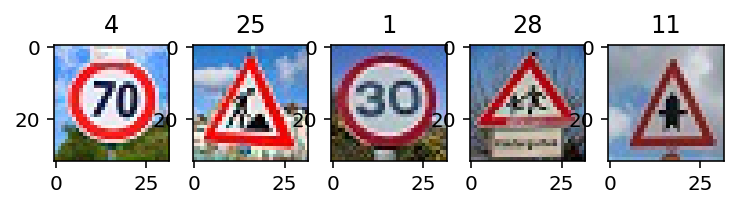

ID:  4, Name: Speed limit (70km/h)
ID: 25, Name: Road work
ID:  1, Name: Speed limit (30km/h)
ID: 28, Name: Children crossing
ID: 11, Name: Right-of-way at the next intersection


In [71]:
# read new set of images not part of training, validation, and test data set
test_new_X, test_new_Y = helper.get_new_test_images()

# show these images with their Ids
helper.show_images(test_new_X, test_new_Y)

In [72]:
# preprocess the data 
helper.preprocess_save_data(test_new_X, test_new_Y, preprocess_data, data_type = "test_new")

Saved pre-processed test_new data to file ./data/preprocess_test_new.p


### Predict the Sign Type for Each Image

In [101]:
# predict label for new images with top5 predictions
top_n_predictions = predict(model_path, data_type = 'test_new', top_n = 5)


INFO:tensorflow:Restoring parameters from ./checkpoint/traffic_sign_classification


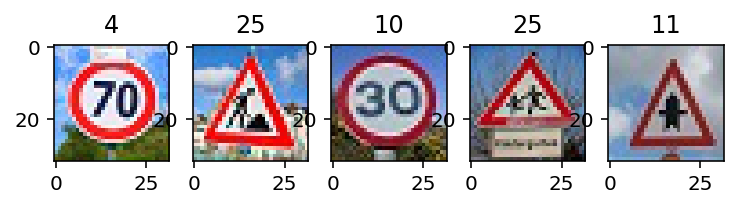

ID:  4, Name: Speed limit (70km/h)
ID: 25, Name: Road work
ID: 10, Name: No passing for vehicles over 3.5 metric tons
ID: 25, Name: Road work
ID: 11, Name: Right-of-way at the next intersection


In [74]:
# show prediction for new images
pred_labels = top_n_predictions[:, 0]

helper.show_images(test_new_X, pred_labels)

### Analyze Performance

In [75]:
# record performance over new images
print('Neural network accuracy over new images: {:4}%'.format(np.mean(pred_labels == test_new_Y) * 100))


Neural network accuracy over new images: 60.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

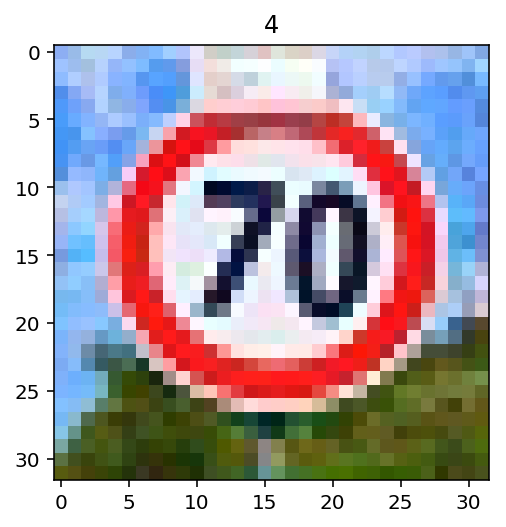

Top-1: ID:  4, Name: Speed limit (70km/h)
Top-2: ID:  3, Name: Speed limit (60km/h)
Top-3: ID:  0, Name: Speed limit (20km/h)
Top-4: ID:  5, Name: Speed limit (80km/h)
Top-5: ID:  1, Name: Speed limit (30km/h)
IMAGE: ID:  4, Name: Speed limit (70km/h) 



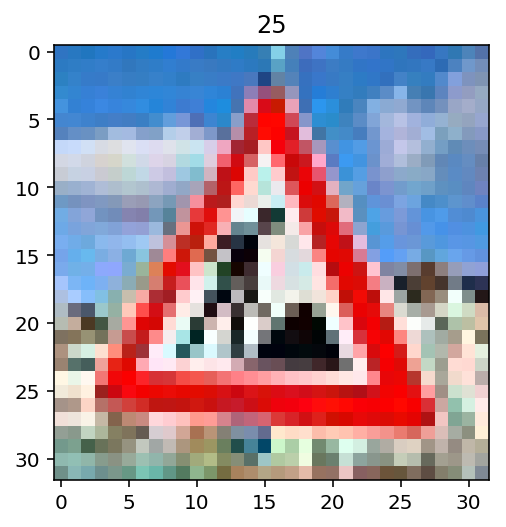

Top-1: ID: 25, Name: Road work
Top-2: ID: 31, Name: Wild animals crossing
Top-3: ID: 35, Name: Ahead only
Top-4: ID: 22, Name: Bumpy road
Top-5: ID: 21, Name: Double curve
IMAGE: ID: 25, Name: Road work 



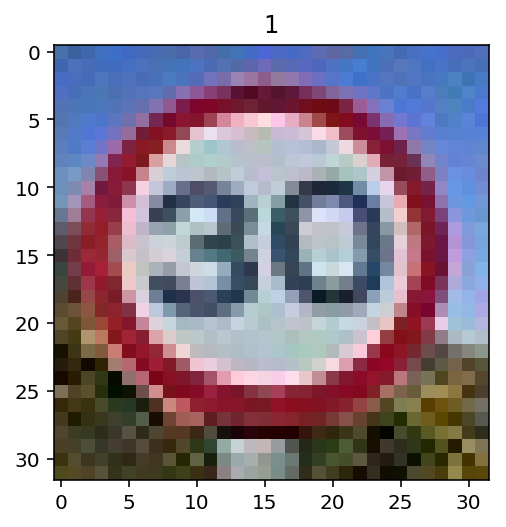

Top-1: ID: 10, Name: No passing for vehicles over 3.5 metric tons
Top-2: ID:  1, Name: Speed limit (30km/h)
Top-3: ID: 38, Name: Keep right
Top-4: ID:  5, Name: Speed limit (80km/h)
Top-5: ID: 40, Name: Roundabout mandatory
IMAGE: ID:  1, Name: Speed limit (30km/h) 



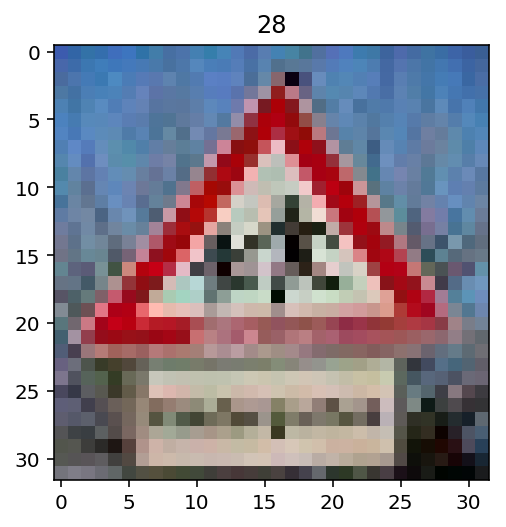

Top-1: ID: 25, Name: Road work
Top-2: ID: 20, Name: Dangerous curve to the right
Top-3: ID: 36, Name: Go straight or right
Top-4: ID:  3, Name: Speed limit (60km/h)
Top-5: ID: 38, Name: Keep right
IMAGE: ID: 28, Name: Children crossing 



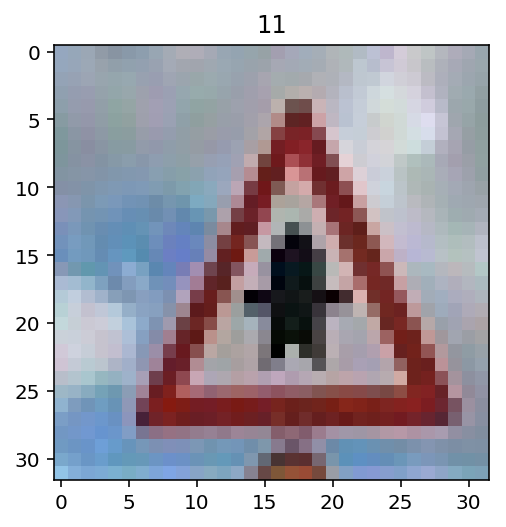

Top-1: ID: 11, Name: Right-of-way at the next intersection
Top-2: ID: 30, Name: Beware of ice/snow
Top-3: ID: 27, Name: Pedestrians
Top-4: ID: 42, Name: End of no passing by vehicles over 3.5 metric tons
Top-5: ID: 20, Name: Dangerous curve to the right
IMAGE: ID: 11, Name: Right-of-way at the next intersection 



In [76]:
# show top-5 predictions for each image
helper.show_top_n_predictions(test_new_X, test_new_Y, top_n_predictions)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [77]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure 
# that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, 
# by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block,
# just extend the plt number for each new feature map entry

import matplotlib.pyplot as plt

def outputFeatureMap(session, x, tf_activation, image_input, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    activation = tf_activation.eval(session=session, feed_dict={x : image_input})
    
    featuremaps = activation.shape[3]
    
    print('Activation feature map: {}'.format(featuremaps))
    
    plt.figure(plt_num, figsize=(15,15))
    
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./checkpoint/traffic_sign_classification
Activation feature map: 4


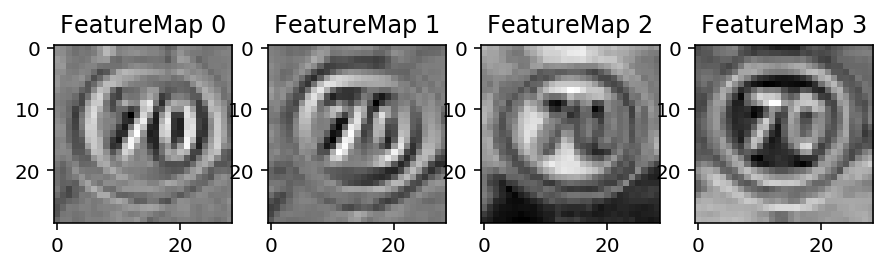

In [78]:
# show feature maps for new image
test_x, test_y = helper.get_preprocess_data(data_type = 'test_new')

loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as session:
    
    loader = tf.train.import_meta_graph(model_path + '.meta')
    
    loader.restore(session, model_path)
    
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    tensor   = loaded_graph.get_tensor_by_name('Conv2D:0')
    image    = test_x[0].reshape(1, 32, 32, 1)
            
    outputFeatureMap(session, loaded_x, tensor, image)